# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [4]:
df = pd.read_csv('./data/shaq_stats.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [7]:
#show 5 rows, sampled at random
df.sample(5)

,Season,SeasGm,CarrGm,Date,Age,Tm,Home,Opp,Win,teamdiff,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Pls/Mns
969,15,29,970,39164,35.0465,MIA,0,IND,0,-25,...,2,3,0,0,1,2,4,13,6.4,-19.0
261,4,21,262,35101,23.9227,ORL,1,SAC,1,10,...,4,5,2,0,3,1,2,22,16.7,NaN
1092,17,51,1093,39871,36.9802,PHO,1,TOR,1,20,...,8,11,2,3,1,3,4,45,39.3,17.0
619,10,12,620,37218,29.7173,LAL,1,GSW,1,16,...,9,10,1,0,2,3,3,20,13.6,21.0
424,7,19,425,36228,27.0082,LAL,0,LAC,1,4,...,8,12,2,0,5,6,6,31,20.7,NaN


In [6]:
#show each column and corresponding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    1207 non-null   int64  
 1   SeasGm    1207 non-null   int64  
 2   CarrGm    1207 non-null   int64  
 3   Date      1207 non-null   int64  
 4   Age       1207 non-null   float64
 5   Tm        1207 non-null   object 
 6   Home      1207 non-null   int64  
 7   Opp       1207 non-null   object 
 8   Win       1207 non-null   int64  
 9   teamdiff  1207 non-null   int64  
 10  GS        1207 non-null   int64  
 11  Minutes   1207 non-null   float64
 12  FG        1207 non-null   int64  
 13  FGA       1207 non-null   int64  
 14  FG%       1206 non-null   float64
 15  3P        1207 non-null   int64  
 16  3PA       1207 non-null   int64  
 17  3P%       22 non-null     float64
 18  FT        1207 non-null   int64  
 19  FTA       1207 non-null   int64  
 20  FT%       1182 non-null   floa

Unique feature: the dataset includes stats for plus/minus ('Pls/Mns'), but the statistic was not tracked by the NBA until the 9th season of Shaq's career, so the values in this field are NaNs up until this point this can be seen in the queries below:

In [11]:
#before 9th season:
df_beforePlsMns = df[df['Season'] < 9]
df_beforePlsMns.loc[:,['Season','Pls/Mns']]

,Season,Pls/Mns
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
...,...,...
529,8,NaN
530,8,NaN
531,8,NaN
532,8,NaN


In [14]:
#after 9th season:
df_afterPlsMns = df[df['Season'] >= 9]
df_afterPlsMns.loc[:,['Season','Pls/Mns']]

,Season,Pls/Mns
534,9,7.0
535,9,2.0
536,9,20.0
537,9,13.0
538,9,-6.0
...,...,...
1202,19,7.0
1203,19,0.0
1204,19,-4.0
1205,19,-2.0


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

I do not believe this dataset needs munging before moving forward with the analysis. While there are missing values, these are handled consistently throughout the dataset and it would not make sense to replace them with zeroes. In addition to the NaN values in the ```Pls/Mns``` field I explained above, the ```3P%``` and ```FT%``` fields are expressed as empty values for games where Shaq did not attempt a 3-pointer or free throw. Replacing these with zeroes would mean they are expressed the same as games where he was 0/2, 0/3, etc. The ```Date``` field is expressed as days passed since January 1, 1900, and the ```Age``` column is expressed as a floating point, which makes these values easy to compare and sort. Overall, the structure of the dataset is optimal for performing analysis.

In [20]:
#missing values for '3P%'
df_no3PA = df[df['3P%'].isnull()]
df_no3PA.loc[:,['3PA','3P','3P%']]

,3PA,3P,3P%
0,0,0,NaN
1,0,0,NaN
2,0,0,NaN
3,0,0,NaN
4,0,0,NaN
...,...,...,...
1202,0,0,NaN
1203,0,0,NaN
1204,0,0,NaN
1205,0,0,NaN


In [22]:
#missing values for 'FT%'
df_noFTA = df[df['FT%'].isnull()]
df_noFTA.loc[:,['FTA','FT','FT%']]

,FTA,FT,FT%
8,0,0,NaN
214,0,0,NaN
274,0,0,NaN
460,0,0,NaN
862,0,0,NaN
895,0,0,NaN
953,0,0,NaN
986,0,0,NaN
996,0,0,NaN
1019,0,0,NaN


In [23]:
#sample for 'Date', 'Age' fields
df_dateAge = df.loc[:,['Date','Age']]
df_dateAge.sample(5)

,Date,Age
124,34367,21.9117
1013,39468,35.8789
671,37357,30.0986
0,33914,20.6708
94,34307,21.7474


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

Shaq was notorious for being fouled intentionally by opposing teams as he was a poor free throw shooter. It would be interesting to know how many games he had where he shot a high number of free throws. The code below groups the rows by ```FT```, and counts the number of time he shot each amount of free throws.

In [24]:
df.groupby('FT')['FT'].count()

FT
0      52
1     105
2     146
3     158
4     144
5     128
6     137
7      96
8      84
9      50
10     37
11     25
12     21
13     13
14      4
15      5
16      1
19      1
Name: FT, dtype: int64

Next, I wanted to calculate Shaq's career free throw percentage. I did this by dividing the total of the ```FT``` column by the total of the ```FTA``` column.

In [29]:
df_totalFT = df['FT'].sum()
df_totalFTA = df['FTA'].sum()
df_FTP = df_totalFT/df_totalFTA
print("Career free throw percentage: ",df_FTP)

Career free throw percentage:  0.5274617845716317


To see if fatigue impacted Shaq's performance, I ran the code below to compare his scoring average in the first twenty games of a given season vs. the final twenty games.

In [28]:
#first twenty games of a given season
df_first20 = df[df['SeasGm'] <= 20]
avg_pts_first20 = df_first20['PTS'].mean()
print("Scoring average in first 20 games of the season: ",avg_pts_first20," PPG")

#last twenty games of a given season
df_last20 = df[df['SeasGm'] >= 62]
avg_pts_last20 = df_last20['PTS'].mean()
print("Scoring average in last 20 games of the season: ",avg_pts_last20," PPG")

Scoring average in first 20 games of the season:  22.073684210526316  PPG
Scoring average in last 20 games of the season:  26.93233082706767  PPG


Next, I want to see how much age impacted his production. Assuming he reached his athletic peak at age 30, I want to compare his rebounding average from age 30-33 vs. age 34-37.

In [32]:
#age 30-33
df_3033 = df[(df['Age'] >= 30) & (df['Age'] <= 34)]
avg_reb_3033 = df_3033['TRB'].mean()
print("Rebounding average at age 30-33: ",avg_reb_3033)

#age 34-37
df_3437 = df[(df['Age'] >= 34) & (df['Age'] <= 38)]
avg_reb_3437 = df_3437['TRB'].mean()
print("Rebounding average at age 34-37: ",avg_reb_3437)

Rebounding average at age 30-33:  10.646840148698885
Rebounding average at age 34-37:  8.112903225806452


Finally, I want to see which team Shaq played his best basketball for. I will be using the ```GmSc``` (Gamescore) as an all-encompassing statistic for overall performance for this comparison. The code below groups the rows by the ```Tm``` field and compares the average ```GmSc``` for each group.

In [33]:
df.groupby('Tm')['GmSc'].mean()

Tm
BOS     7.105405
CLE     8.615094
LAL    21.798638
MIA    14.584390
ORL    22.090508
PHO    13.255340
Name: GmSc, dtype: float64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

First, I want to use a bar chart to visualize Shaq's highest-scoring game in each season he played. The following code groups the rows by ```Season```, and plots the maximum value in each group. 

<AxesSubplot:xlabel='Season #', ylabel='Season High'>

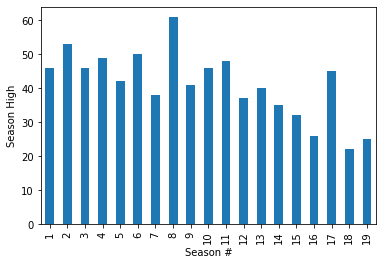

In [35]:
df_seasonHigh = df[['Season','PTS']].groupby('Season')['PTS'].max()
df_seasonHigh.plot.bar(xlabel='Season #',ylabel='Season High',legend=False)

Next, I want to use a pie chart to break down how he scored his points - between 3-pointers, free throws, and two-pointers (rest). 

Text(0.5, 1.0, 'Points Distribution')

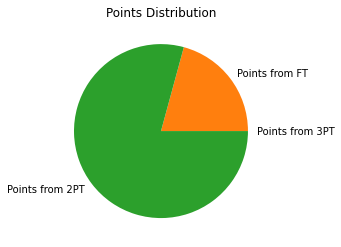

In [37]:
df_totalpoints = df['PTS'].sum()

df_pointsfrom3P = df['3P'].sum() * 3 #multiply by 3 as each 3P is worth 3 points
df_pointsfromFT = df['FT'].sum()
df_pointsfrom2P = df_totalpoints - df_pointsfrom3P - df_pointsfromFT

df_pointsbreakdown = [df_pointsfrom3P, df_pointsfromFT, df_pointsfrom2P]
df_pointsbreakdown_labels = ['Points from 3PT', 'Points from FT', 'Points from 2PT']

plt.pie(df_pointsbreakdown, labels=df_pointsbreakdown_labels)
plt.title("Points Distribution")

Next, I want to use a scatter plot to visualize the correlation between the number of offensive rebounds Shaq gets and his field goal percentage in a given game. I did this by plotting ```ORB``` against ```FG%```. 

Text(0.5, 1.0, 'Offensive Rebounds vs. Field Goal Percentage for a Given Game')

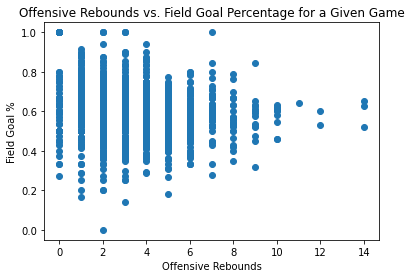

In [39]:
df_ORB_FGP = df[['ORB','FG%']]
x = df_ORB_FGP['ORB']
y = df_ORB_FGP['FG%']

plt.scatter(x,y)
plt.xlabel('Offensive Rebounds')
plt.ylabel('Field Goal %')
plt.title('Offensive Rebounds vs. Field Goal Percentage for a Given Game')


Next, I want to use a bar plot to visualize how many total minutes Shaq played in each season of his career. I did this by grouping the rows by ```Season```, calculating the sum ```Minutes``` for each season, and plotting both values in a bar chart.

<AxesSubplot:xlabel='Season #', ylabel='Total Minutes'>

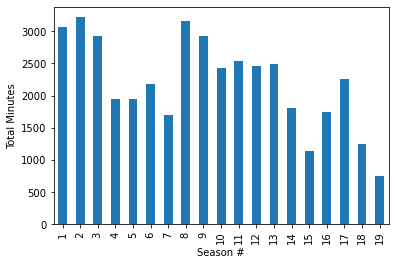

In [41]:
df_totalMinutes = df[['Season','Minutes']].groupby('Season')['Minutes'].sum()
df_totalMinutes.plot.bar(xlabel='Season #',ylabel='Total Minutes',legend=False)

Finally, I want to visualize what Shaq's average plus-minus is against each team. I did this by grouping the rows by the ```Opp``` field, and calculating the average ```Pls/Mns``` for each group. To avoid running into issues, I am only including rows that have real values for ```Pls/Mns```. There is a clear outlier in this plot on account of the fact that he only played one game in his career against the team 'NOK'. 

<AxesSubplot:xlabel='Opponent', ylabel='Average Plus/Minus'>

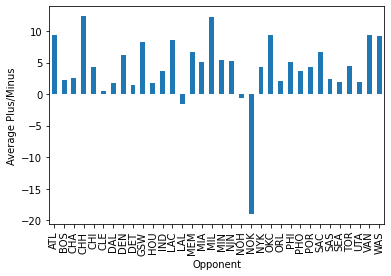

In [42]:
df_notNull = df[df['Pls/Mns'].notnull()]

df_avgPlsMns = df_notNull[['Opp','Pls/Mns']].groupby('Opp')['Pls/Mns'].mean()
df_avgPlsMns.plot.bar(xlabel='Opponent',ylabel='Average Plus/Minus',legend=False)